# Assignment 1 - MSDS 411 Summer 2018
Author: Andrew Knight

TODO: INSERT DESCRIPTION HERE
This is the first assignment for the MSDS 411 Generalized Linear Models course. The objective is to define the best model for predicting the number of wins for each record in the dataset using only the data provided. Each observation represents a single team from a single year between 1871 and 2006. The variables provided give relevant team stats for that year. The data has already been split into training and test sets. You need to analyze, clean and prepare the data and then build, test and present the model chosen in Kaggle.

![](images/wrigley-field.jpg)

### Reference: Baseball Data Dictionary

![](images/baseball_data_dict.png)

### >>>Intro & Setup

In [1]:
'''Notebook Setup:
This notebook presents the data analysis for the Moneyball Baseball Problem.

The summary report can be found in this file: 411 Assignment 1 Andrew Knight.pdf

The data file used: DataDictionary_Baseball.xlsx
'''

# Python imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats
#from sklearn import datasets, linear_model
#from sklearn.feature_selection import f_regression

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

print('Imports completed')

Imports completed


In [2]:
# Load the train and test data
try:
    traindf = pd.read_csv('data/train.csv')
    testdf = pd.read_csv('data/test.csv')
    print('train and test dataframes loaded')
except:
    print('file read error')

train and test dataframes loaded


### Now that data is loaded, I will perform some intial checks of the data set (using training data)

In [3]:
print(traindf.info())
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2276 entries, 0 to 2275
Data columns (total 18 columns):
Unnamed: 0          2276 non-null int64
INDEX               2276 non-null float64
TARGET_WINS         2276 non-null float64
TEAM_BATTING_H      2276 non-null float64
TEAM_BATTING_2B     2276 non-null float64
TEAM_BATTING_3B     2276 non-null float64
TEAM_BATTING_HR     2276 non-null float64
TEAM_BATTING_BB     2276 non-null float64
TEAM_BATTING_SO     2174 non-null float64
TEAM_BASERUN_SB     2145 non-null float64
TEAM_BASERUN_CS     1504 non-null float64
TEAM_BATTING_HBP    191 non-null float64
TEAM_PITCHING_H     2276 non-null float64
TEAM_PITCHING_HR    2276 non-null float64
TEAM_PITCHING_BB    2276 non-null float64
TEAM_PITCHING_SO    2174 non-null float64
TEAM_FIELDING_E     2276 non-null float64
TEAM_FIELDING_DP    1990 non-null float64
dtypes: float64(17), int64(1)
memory usage: 320.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data colum

In [5]:
# The number of NaN is important to understand how many of each variables we have.
#traindf.head(10)
count_nan = len(traindf) - traindf.count()
print(count_nan)

#Also for the test set
count_nan_test = len(testdf) - testdf.count()
print(count_nan_test)

Unnamed: 0             0
INDEX                  0
TARGET_WINS            0
TEAM_BATTING_H         0
TEAM_BATTING_2B        0
TEAM_BATTING_3B        0
TEAM_BATTING_HR        0
TEAM_BATTING_BB        0
TEAM_BATTING_SO      102
TEAM_BASERUN_SB      131
TEAM_BASERUN_CS      772
TEAM_BATTING_HBP    2085
TEAM_PITCHING_H        0
TEAM_PITCHING_HR       0
TEAM_PITCHING_BB       0
TEAM_PITCHING_SO     102
TEAM_FIELDING_E        0
TEAM_FIELDING_DP     286
dtype: int64
Unnamed: 0            0
INDEX                 0
TEAM_BATTING_H        0
TEAM_BATTING_2B       0
TEAM_BATTING_3B       0
TEAM_BATTING_HR       0
TEAM_BATTING_BB       0
TEAM_BATTING_SO      18
TEAM_BASERUN_SB      13
TEAM_BASERUN_CS      87
TEAM_BATTING_HBP    240
TEAM_PITCHING_H       0
TEAM_PITCHING_HR      0
TEAM_PITCHING_BB      0
TEAM_PITCHING_SO     18
TEAM_FIELDING_E       0
TEAM_FIELDING_DP     31
dtype: int64


In [6]:
#traindf.tail(50)

### >>> Section 1 - EDA

TODO: Describe process of EDA here. What step are you performing? Explain you visualizations, etc.

Check basics: 

* mean/sd/med
* Basic plots
* Replace NAs with zeros

** The goal of Section 1 is to perform some basic EDA to gain a better understanding of the data. I should be able to clearly state some details about the data set after the EDA, especially with respect to the data cleaning that is nost needed.**

In [7]:
#Note the missing values are recorded as NaN, we need to replace these with something (median? or your choice)
#start by converting all NaN values to 0
traindf = traindf.fillna(0)
#m = np.median(traindf.TEAM_BATTING_HBP[traindf.TEAM_BATTING_HBP>0])
#traindf['TEAM_PITCHING_IMP'] = 0 # flag for values that get imputed, default of zero indicates original values are used
train1 = traindf
train1 = train1.fillna(0)

#train1 = traindf.replace({'TEAM_BATTING_HBP': {0: m}}) 
#print(train1)

#Make sure whatever you do to the training data you also do to the test data otherwise your model will not score properly
testdf = testdf.fillna(0)
#testdf['TEAM_PITCHING_IMP'] = 0 # flag for values that get imputed, default of zero indicates original values are used
test1 = testdf
test1 = test1.fillna(0)
#test1 = testdf.replace({'TEAM_BATTING_HBP': {0: m}})
#print(test1)

# NOTE: I decided not to use this variable, but rather to simply change in place for this assignment.


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  2276
Variable names:  Index(['Unnamed: 0', 'INDEX', 'TARGET_WINS', 'TEAM_BATTING_H',
       'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_HR',
       'TEAM_BATTING_BB', 'TEAM_BATTING_SO', 'TEAM_BASERUN_SB',
       'TEAM_BASERUN_CS', 'TEAM_BATTING_HBP', 'TEAM_PITCHING_H',
       'TEAM_PITCHING_HR', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_SO',
       'TEAM_FIELDING_E', 'TEAM_FIELDING_DP'],
      dtype='object')
        Unnamed: 0        INDEX  TARGET_WINS  TEAM_BATTING_H  TEAM_BATTING_2B  \
count  2276.000000  2276.000000  2276.000000     2276.000000      2276.000000   
mean   1137.500000  1268.463533    80.790861     1469.269772       241.246924   
std     657.168928   736.349040    15.752152      144.591195        46.801415   
min       0.000000     1.000000     0.000000      891.000000        69.000000   
25%     568.750000   630.750000    71.000000     1383.000000       2

Unnamed: 0             AxesSubplot(0.125,0.749828;0.133621x0.130172)
INDEX               AxesSubplot(0.285345,0.749828;0.133621x0.130172)
TARGET_WINS          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TEAM_BATTING_H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
TEAM_BATTING_2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
TEAM_BATTING_3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
TEAM_BATTING_HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
TEAM_BATTING_BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
TEAM_BATTING_SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
TEAM_BASERUN_SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
TEAM_BASERUN_CS        AxesSubplot(0.125,0.437414;0.133621x0.130172)
TEAM_BATTING_HBP    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
TEAM_PITCHING_H      AxesSubplot(0.44569,0.437414;0.133621x0.130172)
TEAM_PITCHING_HR    AxesSubplot(0.606034,0.437414;0.133621x0.130172)
TEAM_PITCHING_BB    AxesSubplot(0.

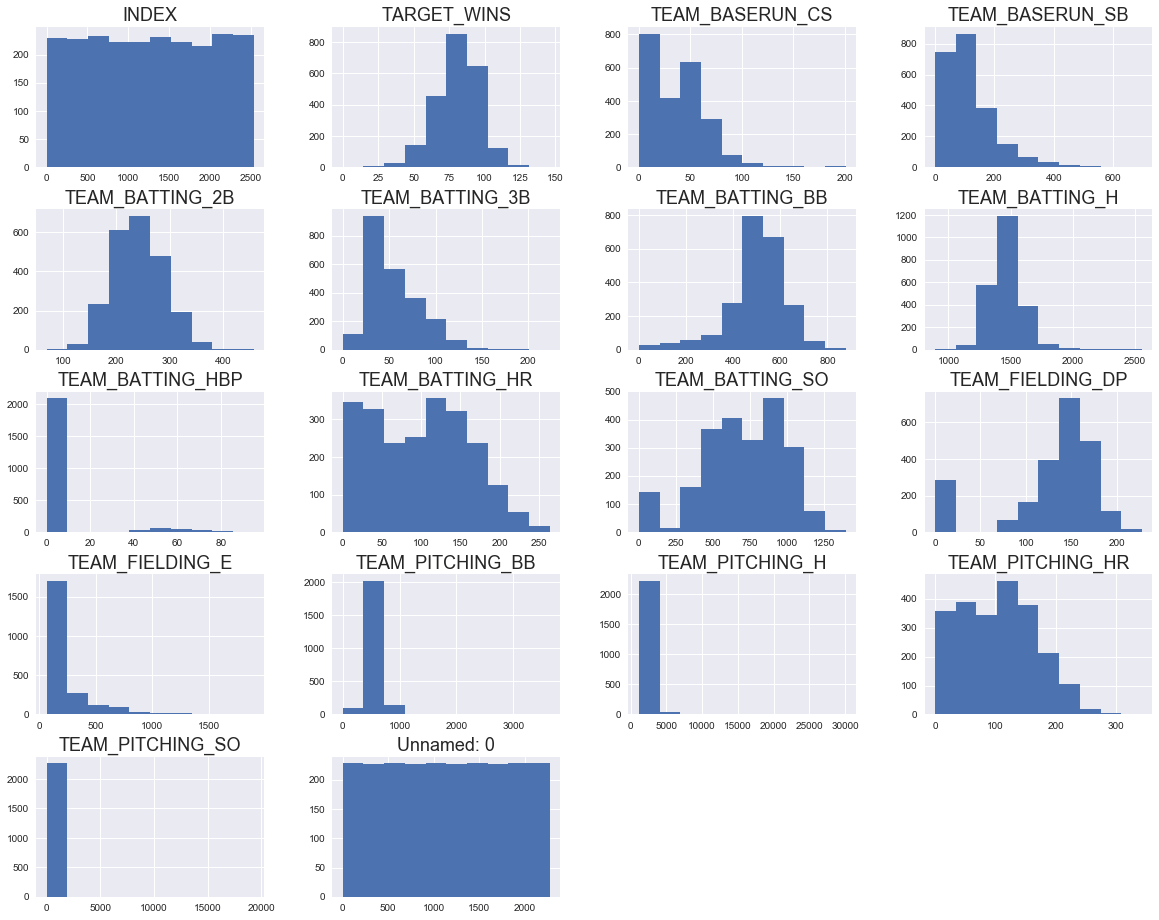

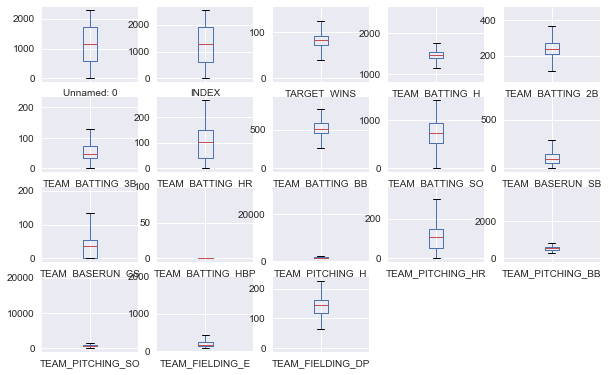

In [21]:
# modified from template
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(traindf))

# show number of observations in the DataFrame
print('Number of observations: ', len(traindf))

# show variable names
print('Variable names: ', traindf.columns)

# show descriptive statistics
print(traindf.describe())

# show a portion of the beginning of the DataFrame
#print(traindf.head())

#Some quick plots of the data
traindf.hist(figsize=(20,16))
traindf.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

In [22]:
'''
These data do not provide dates but rather a complete listing of team stats between years 1871 and 2006. However, we don't neccesarily need 
this dated information to build a model for predicted number of wins. That said, it might be nice to come up with an estiamte of the number of 
teams represented per year. Also, we are assuming from the given instructions that data has been standardized for a 162 game season, for each year.
This means that we will assume each record represents a team that played a total of 162 that year.

'''
years = 2006 - 1871
print('years of baseball in data: ' + str(years))

teams = round(len(traindf) / years, 0)
print('avg teams represented in data: ' + str(teams))

years of baseball in data: 135
avg teams represented in data: 17.0


In [23]:
# Section 1 Results:
'''
These following items should be addressed before building the model.
'''
# 1. Due to the number of missing values in variables TEAM_BATTING_HBP, TEAM_BASERUN_CS I will likely not be using these variables in my models.

# 2. Bsaed on the distributions shown above, these variables may be candidates for using a transformation
# TEAM_BASERUN_SB, TEAM_PITCHING_BB, TEAM_PITCHING_H, TEAM_PITCHING_HR

# These variables

'\nThese following items should be addressed before building the model.\n'

### >>> Section 2 - Data Preparation

TODO: Explain steps taken in this section. Now it's time to actually clean the data to correct issues discovered above. Also highlight any outlier corrections, transformations, or new variables used here.

Data Cleaning:

* Check outliers
* Check assumptions; correlated variables, linearity, etc
* Is log transformation required? Dummy variables?
* Create new variables by combining some

**The goal of Section 2 is to end up with a cleaned data frame for both train and test so that I can use this for building the best model.**

In [24]:
# First lets see how many records contain zero wins
train1[train1['TARGET_WINS'] < 10]

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
1210,1210,1347.0,0.0,891.0,135.0,55.25,99.612039,501.558875,702.63884,117.580844,0.0,0.0,24057.0,105.698594,553.007909,766.310193,739.0,127.99297


In [25]:
# We have one record that contains zero wins, this seems suspect for a 100+ game season, no matter how bad they are.
# Let's drop this record as I believe this data is invalid
train1 = train1.drop([1210])

# Also considered updating the target wins for this one record to 0.1 to avoid a division by zero situation
# train1.iloc[1210, 2] = 0.1

In [26]:
# Next, let's check some of the other pitching stats with zero values that seem suspect.
for v in traindf.columns:
    print('Zeros in ' + str(v) + ': ' + str(len(train1[train1[str(v)] < 1])))

print(len(train1[train1['TEAM_PITCHING_HR'] < 1]))
print(len(train1[train1['TEAM_PITCHING_BB'] < 1]))
print(len(train1[train1['TEAM_PITCHING_SO'] < 1]))

Zeros in Unnamed: 0: 1
Zeros in INDEX: 0
Zeros in TARGET_WINS: 0
Zeros in TEAM_BATTING_H: 0
Zeros in TEAM_BATTING_2B: 0
Zeros in TEAM_BATTING_3B: 0
Zeros in TEAM_BATTING_HR: 0
Zeros in TEAM_BATTING_BB: 0
Zeros in TEAM_BATTING_SO: 0
Zeros in TEAM_BASERUN_SB: 0
Zeros in TEAM_BASERUN_CS: 772
Zeros in TEAM_BATTING_HBP: 2084
Zeros in TEAM_PITCHING_H: 0
Zeros in TEAM_PITCHING_HR: 0
Zeros in TEAM_PITCHING_BB: 0
Zeros in TEAM_PITCHING_SO: 0
Zeros in TEAM_FIELDING_E: 0
Zeros in TEAM_FIELDING_DP: 0
0
0
0


In [27]:
print(len(train1[train1['TEAM_PITCHING_SO'] > (3 * np.mean(train1['TEAM_PITCHING_SO']))]))
print(len(train1[train1['TEAM_FIELDING_E'] > (3 * np.mean(train1['TEAM_FIELDING_E']))]))

# Now let's check extreme outliers for var:
print('Number of outliers greater than 3 x mean for...')
for v in traindf.columns:
    print(str(v) + ': ' + str(len(train1[train1[str(v)] > (3 * np.mean(train1[str(v)]))])))

0
122
Number of outliers greater than 3 x mean for...
Unnamed: 0: 0
INDEX: 0
TARGET_WINS: 0
TEAM_BATTING_H: 0
TEAM_BATTING_2B: 0
TEAM_BATTING_3B: 5
TEAM_BATTING_HR: 0
TEAM_BATTING_BB: 0
TEAM_BATTING_SO: 0
TEAM_BASERUN_SB: 52
TEAM_BASERUN_CS: 42
TEAM_BATTING_HBP: 191
TEAM_PITCHING_H: 36
TEAM_PITCHING_HR: 3
TEAM_PITCHING_BB: 6
TEAM_PITCHING_SO: 0
TEAM_FIELDING_E: 122
TEAM_FIELDING_DP: 0


In [28]:
# Next, let's address the outliers for some specific predictors.

#The first extreme outlier is in the TEAM_PITCHING_SO, the max value clearly has an issue. The 75th percentile is 968 while the max value is 19,278. 
#I'm going to cap this max value by imputing value with new max value of 1000.
# if(train1[train1['TEAM_PITCHING_SO']] > (3 * np.mean(train1['TEAM_PITCHING_SO']))):
#     train1['TEAM_PITCHING_SO_1'] = (3 * np.mean(train1['TEAM_PITCHING_SO']))
#     train1['TEAM_PITCHING_IMP'] = 1

#     m = np.median(train.TEAM_PITCHING_SO[train.TEAM_PITCHING_SO > 0])
# train1=train.replace({'team_batting_hbp': {0: m}}) 
#print(3 * np.mean(train1['TEAM_PITCHING_SO']))

# train1['TEAM_PITCHING_SO'].min()
# sort_teampitchingso = train1.sort_values('TEAM_PITCHING_SO')
# print(sort_teampitchingso.tail(n=3))

print('TRAIN DATA\n------------')

# TEAM_PITCHING_SO trim extreme high outliers
a = np.array(train1['TEAM_PITCHING_SO'].values.tolist())
train1['TEAM_PITCHING_SO'] = np.where(a > (3 * np.mean(train1['TEAM_PITCHING_SO'])), round(3 * np.mean(train1['TEAM_PITCHING_SO']), 0), a).tolist()
print('New TEAM_PITCHING_SO max values is: ' + str(train1['TEAM_PITCHING_SO'].max()))

# TEAM_FIELDING_E trim extreme high outliers
a = np.array(train1['TEAM_FIELDING_E'].values.tolist())
train1['TEAM_FIELDING_E'] = np.where(a > (3 * np.mean(train1['TEAM_FIELDING_E'])), round(3 * np.mean(train1['TEAM_FIELDING_E']), 0), a).tolist()
print('New TEAM_FIELDING_E max values is: ' + str(train1['TEAM_FIELDING_E'].max()))

# TEAM_FIELDING_DP zero values - replace with the mean
a = np.array(train1['TEAM_FIELDING_DP'].values.tolist())
train1['TEAM_FIELDING_DP'] = np.where(a == 0, np.mean(train1['TEAM_FIELDING_DP']), a).tolist()
print('New TEAM_FIELDING_DP min value is: ' + str(train1['TEAM_FIELDING_DP'].min()))

# TEAM_PITCHING_BB zero values - replace with the mean
a = np.array(train1['TEAM_PITCHING_BB'].values.tolist())
train1['TEAM_PITCHING_BB'] = np.where(a == 0, np.mean(train1['TEAM_PITCHING_BB']), a).tolist()
print('New TEAM_PITCHING_BB min value is: ' + str(train1['TEAM_PITCHING_BB'].min()))

# TEAM_PITCHING_HR zero values - replace with the mean
a = np.array(train1['TEAM_PITCHING_HR'].values.tolist())
train1['TEAM_PITCHING_HR'] = np.where(a == 0, np.mean(train1['TEAM_PITCHING_HR']), a).tolist()
print('New TEAM_PITCHING_HR min value is: ' + str(train1['TEAM_PITCHING_HR'].min()))

# TEAM_BASERUN_SB zero values - replace with the mean
a = np.array(train1['TEAM_BASERUN_SB'].values.tolist())
train1['TEAM_BASERUN_SB'] = np.where(a == 0, np.mean(train1['TEAM_BASERUN_SB']), a).tolist()
print('New TEAM_BASERUN_SB min value is: ' + str(train1['TEAM_BASERUN_SB'].min()))

# TEAM_BATTING_3B zero values - replace with the mean
a = np.array(train1['TEAM_BATTING_3B'].values.tolist())
train1['TEAM_BATTING_3B'] = np.where(a == 0, np.mean(train1['TEAM_BATTING_3B']), a).tolist()
print('New TEAM_BATTING_3B min value is: ' + str(train1['TEAM_BATTING_3B'].min()))

# TEAM_BATTING_BB zero values - replace with the mean
a = np.array(train1['TEAM_BATTING_BB'].values.tolist())
train1['TEAM_BATTING_BB'] = np.where(a == 0, np.mean(train1['TEAM_BATTING_BB']), a).tolist()
print('New TEAM_BATTING_BB min value is: ' + str(train1['TEAM_BATTING_BB'].min()))

# TEAM_BATTING_SO zero values - replace with the mean
a = np.array(train1['TEAM_BATTING_SO'].values.tolist())
train1['TEAM_BATTING_SO'] = np.where(a == 0, np.mean(train1['TEAM_BATTING_SO']), a).tolist()
print('New TEAM_BATTING_SO min value is: ' + str(train1['TEAM_BATTING_SO'].min()))

# TEAM_BATTING_HR zero values - replace with the mean
a = np.array(train1['TEAM_BATTING_HR'].values.tolist())
train1['TEAM_BATTING_HR'] = np.where(a == 0, np.mean(train1['TEAM_BATTING_HR']), a).tolist()
print('New TEAM_BATTING_HR min value is: ' + str(train1['TEAM_BATTING_HR'].min()))

# TEAM_PITCHING_SO zero values - replace with the mean
a = np.array(train1['TEAM_PITCHING_SO'].values.tolist())
train1['TEAM_PITCHING_SO'] = np.where(a == 0, np.mean(train1['TEAM_PITCHING_SO']), a).tolist()
print('New TEAM_PITCHING_SO min value is: ' + str(train1['TEAM_PITCHING_SO'].min()))

'''
DO THE SAME FOR THE TEST SET
'''
print('\nTEST DATA\n------------')
# 1. TEAM_PITCHING_SO extreme high outliers
a = np.array(test1['TEAM_PITCHING_SO'].values.tolist())
test1['TEAM_PITCHING_SO'] = np.where(a > (3 * np.mean(test1['TEAM_PITCHING_SO'])), round(3 * np.mean(test1['TEAM_PITCHING_SO']), 0), a).tolist()
print('New TEAM_PITCHING_SO max values is: ' + str(test1['TEAM_PITCHING_SO'].max()))

# TEAM_FIELDING_E trim extreme high outliers
a = np.array(test1['TEAM_FIELDING_E'].values.tolist())
test1['TEAM_FIELDING_E'] = np.where(a > (3 * np.mean(test1['TEAM_FIELDING_E'])), round(3 * np.mean(test1['TEAM_FIELDING_E']), 0), a).tolist()
print('New TEAM_FIELDING_E max values is: ' + str(test1['TEAM_FIELDING_E'].max()))

# TEAM_FIELDING_DP zero values - replace with the mean
a = np.array(test1['TEAM_FIELDING_DP'].values.tolist())
test1['TEAM_FIELDING_DP'] = np.where(a == 0, np.mean(test1['TEAM_FIELDING_DP']), a).tolist()
print('New TEAM_FIELDING_DP min value is: ' + str(test1['TEAM_FIELDING_DP'].min()))

# 2 TEAM_PITCHING_BB zero values - replace with the mean
a = np.array(test1['TEAM_PITCHING_BB'].values.tolist())
test1['TEAM_PITCHING_BB'] = np.where(a == 0, np.mean(test1['TEAM_PITCHING_BB']), a).tolist()
print('New TEAM_PITCHING_BB min value is: ' + str(test1['TEAM_PITCHING_BB'].min()))

# 3 TEAM_PITCHING_HR zero values - replace with the mean
a = np.array(test1['TEAM_PITCHING_HR'].values.tolist())
test1['TEAM_PITCHING_HR'] = np.where(a == 0, np.mean(test1['TEAM_PITCHING_HR']), a).tolist()
print('New TEAM_PITCHING_HR min value is: ' + str(test1['TEAM_PITCHING_HR'].min()))

# 3 TEAM_BASERUN_SB zero values - replace with the mean
a = np.array(test1['TEAM_BASERUN_SB'].values.tolist())
test1['TEAM_BASERUN_SB'] = np.where(a == 0, np.mean(test1['TEAM_BASERUN_SB']), a).tolist()
print('New TEAM_BASERUN_SB min value is: ' + str(test1['TEAM_BASERUN_SB'].min()))

# TEAM_BATTING_3B zero values - replace with the mean
a = np.array(test1['TEAM_BATTING_3B'].values.tolist())
test1['TEAM_BATTING_3B'] = np.where(a == 0, np.mean(test1['TEAM_BATTING_3B']), a).tolist()
print('New TEAM_BATTING_3B min value is: ' + str(test1['TEAM_BATTING_3B'].min()))

# TEAM_BATTING_BB zero values - replace with the mean
a = np.array(test1['TEAM_BATTING_BB'].values.tolist())
test1['TEAM_BATTING_BB'] = np.where(a == 0, np.mean(test1['TEAM_BATTING_BB']), a).tolist()
print('New TEAM_BATTING_BB min value is: ' + str(test1['TEAM_BATTING_BB'].min()))

# TEAM_BATTING_SO zero values - replace with the mean
a = np.array(test1['TEAM_BATTING_SO'].values.tolist())
test1['TEAM_BATTING_SO'] = np.where(a == 0, np.mean(test1['TEAM_BATTING_SO']), a).tolist()
print('New TEAM_BATTING_SO min value is: ' + str(test1['TEAM_BATTING_SO'].min()))

# TEAM_BATTING_HR zero values - replace with the mean
a = np.array(test1['TEAM_BATTING_HR'].values.tolist())
test1['TEAM_BATTING_HR'] = np.where(a == 0, np.mean(test1['TEAM_BATTING_HR']), a).tolist()
print('New TEAM_BATTING_HR min value is: ' + str(test1['TEAM_BATTING_HR'].min()))

# TEAM_PITCHING_SO zero values - replace with the mean
a = np.array(test1['TEAM_PITCHING_SO'].values.tolist())
test1['TEAM_PITCHING_SO'] = np.where(a == 0, np.mean(test1['TEAM_PITCHING_SO']), a).tolist()
print('New TEAM_PITCHING_SO min value is: ' + str(test1['TEAM_PITCHING_SO'].min()))

print(train1.describe())

TRAIN DATA
------------
New TEAM_PITCHING_SO max values is: 2343.0
New TEAM_FIELDING_E max values is: 697.0
New TEAM_FIELDING_DP min value is: 52.0
New TEAM_PITCHING_BB min value is: 119.0
New TEAM_PITCHING_HR min value is: 3.0
New TEAM_BASERUN_SB min value is: 14.0
New TEAM_BATTING_3B min value is: 8.0
New TEAM_BATTING_BB min value is: 12.0
New TEAM_BATTING_SO min value is: 66.0
New TEAM_BATTING_HR min value is: 3.0
New TEAM_PITCHING_SO min value is: 181.0

TEST DATA
------------
New TEAM_PITCHING_SO max values is: 2232.0
New TEAM_FIELDING_E max values is: 701.0
New TEAM_FIELDING_DP min value is: 69.0
New TEAM_PITCHING_BB min value is: 136.0
New TEAM_PITCHING_HR min value is: 7.0
New TEAM_BASERUN_SB min value is: 14.0
New TEAM_BATTING_3B min value is: 14.0
New TEAM_BATTING_BB min value is: 15.0
New TEAM_BATTING_SO min value is: 44.0
New TEAM_BATTING_HR min value is: 3.0
New TEAM_PITCHING_SO min value is: 315.0
        Unnamed: 0        INDEX  TARGET_WINS  TEAM_BATTING_H  TEAM_BATTING_

In [50]:
# Now, let's add some additional columns to the training data frame
#train1['LOG_TARGET_WINS'] = np.log(train1['TARGET_WINS']) #log response
#train1['SQRT_TARGET_WINS'] = np.sqrt(train1['TARGET_WINS']) #sqrt response

train1['LOG_TEAM_BASERUN_SB'] = np.log(train1['TEAM_BASERUN_SB']) #log baserun
train1['LOG_TEAM_PITCHING_BB'] = np.log(train1['TEAM_PITCHING_BB']) #log walks allowed
train1['LOG_TEAM_PITCHING_H'] = np.log(train1['TEAM_PITCHING_H']) #log hits allowed
train1['LOG_TEAM_PITCHING_HR'] = np.log(train1['TEAM_PITCHING_HR']) #log home runs allowed
#train1['TEAM_BATTING_1B'] = (train1['TEAM_BATTING_H'] - train1['TEAM_BATTING_HR'] - train1['TEAM_BATTING_2B'] - train1['TEAM_BATTING_3B']) #1B hits only

# train1['LOG_TEAM_BATTING_1B'] = np.log(train1['TEAM_BATTING_1B'])
# train1['LOG_TEAM_BATTING_2B'] = np.log(train1['TEAM_BATTING_2B'])
# train1['LOG_TEAM_BATTING_3B'] = np.log(train1['TEAM_BATTING_3B'])
# train1['LOG_TEAM_BATTING_HR'] = np.log(train1['TEAM_BATTING_HR'])
# train1['LOG_TEAM_BATTING_BB'] = np.log(train1['TEAM_BATTING_BB'])

In [14]:
# Also add same predictor variable columns to the test data frame, do not add any of the new response vars (TARGET_WINS not included in test)
#test1['LOG_TEAM_BATTING_H'] = np.log(test1['TEAM_BATTING_H']) #log hitting pred var
#test1['SQRT_TEAM_BATTING_H'] = np.sqrt(test1['TEAM_BATTING_H']) #sqrt hitting pred var
#test1['TEAM_BATTING_1B'] = (test1['TEAM_BATTING_H'] - test1['TEAM_BATTING_HR'] - test1['TEAM_BATTING_2B'] - test1['TEAM_BATTING_3B']) #1B hits only

test1['LOG_TEAM_BASERUN_SB'] = np.log(test1['TEAM_BASERUN_SB']) #log baserun
test1['LOG_TEAM_PITCHING_BB'] = np.log(test1['TEAM_PITCHING_BB']) #log walks allowed
test1['LOG_TEAM_PITCHING_H'] = np.log(test1['TEAM_PITCHING_H']) #log hits allowed
test1['LOG_TEAM_PITCHING_HR'] = np.log(test1['TEAM_PITCHING_HR']) #log hoe runs allowed

In [51]:
# Now let's verify new additions to train1 and test1 data frames
print(train1.info())
print(test1.info())
train1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2275
Data columns (total 22 columns):
Unnamed: 0              2275 non-null int64
INDEX                   2275 non-null float64
TARGET_WINS             2275 non-null float64
TEAM_BATTING_H          2275 non-null float64
TEAM_BATTING_2B         2275 non-null float64
TEAM_BATTING_3B         2275 non-null float64
TEAM_BATTING_HR         2275 non-null float64
TEAM_BATTING_BB         2275 non-null float64
TEAM_BATTING_SO         2275 non-null float64
TEAM_BASERUN_SB         2275 non-null float64
TEAM_BASERUN_CS         2275 non-null float64
TEAM_BATTING_HBP        2275 non-null float64
TEAM_PITCHING_H         2275 non-null float64
TEAM_PITCHING_HR        2275 non-null float64
TEAM_PITCHING_BB        2275 non-null float64
TEAM_PITCHING_SO        2275 non-null float64
TEAM_FIELDING_E         2275 non-null float64
TEAM_FIELDING_DP        2275 non-null float64
LOG_TEAM_BASERUN_SB     2275 non-null float64
LOG_TEAM_PITCHING_BB 

,Unnamed: 0,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,...,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP,LOG_TEAM_BASERUN_SB,LOG_TEAM_PITCHING_BB,LOG_TEAM_PITCHING_H,LOG_TEAM_PITCHING_HR
count,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,...,2275.000000,2275.000000,2275.000000,2275.000000,2275.00000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000
mean,1137.468132,1268.429011,80.826374,1469.523956,241.293626,55.298571,100.268821,501.779341,740.318813,124.454801,...,1769.418022,106.395508,553.250989,807.404630,230.34022,144.083515,4.629686,6.284006,7.401675,4.437700
std,657.311649,736.509087,15.664221,144.113466,46.758628,27.896579,60.013765,122.245998,233.020420,85.181498,...,1327.302422,60.704264,165.989151,247.339494,168.05354,25.272797,0.622929,0.248253,0.301678,0.764495
min,0.000000,1.000000,12.000000,992.000000,69.000000,8.000000,3.000000,12.000000,66.000000,14.000000,...,1137.000000,3.000000,119.000000,181.000000,65.00000,52.000000,2.639057,4.779123,7.036148,1.098612
25%,568.500000,630.500000,71.000000,1383.000000,208.000000,34.000000,42.500000,451.000000,562.000000,67.000000,...,1419.000000,52.000000,476.000000,633.000000,127.00000,127.992970,4.204693,6.165418,7.257708,3.951244
50%,1137.000000,1270.000000,82.000000,1454.000000,238.000000,47.000000,102.000000,512.000000,729.000000,106.000000,...,1518.000000,107.000000,537.000000,797.000000,159.00000,145.000000,4.663439,6.285998,7.325149,4.672829
75%,1706.500000,1916.000000,92.000000,1537.500000,273.000000,72.000000,147.000000,580.000000,925.000000,151.000000,...,1682.000000,150.000000,611.000000,957.000000,249.00000,161.500000,5.017280,6.415097,7.427739,5.010635
max,2275.000000,2535.000000,146.000000,2554.000000,458.000000,223.000000,264.000000,878.000000,1399.000000,697.000000,...,30132.000000,343.000000,3645.000000,2343.000000,697.00000,228.000000,6.546785,8.201112,10.313343,5.837730


Unnamed: 0                 AxesSubplot(0.125,0.749828;0.133621x0.130172)
INDEX                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
TEAM_BATTING_H           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
TEAM_BATTING_2B         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
TEAM_BATTING_3B         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
TEAM_BATTING_HR            AxesSubplot(0.125,0.593621;0.133621x0.130172)
TEAM_BATTING_BB         AxesSubplot(0.285345,0.593621;0.133621x0.130172)
TEAM_BATTING_SO          AxesSubplot(0.44569,0.593621;0.133621x0.130172)
TEAM_BASERUN_SB         AxesSubplot(0.606034,0.593621;0.133621x0.130172)
TEAM_BASERUN_CS         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
TEAM_BATTING_HBP           AxesSubplot(0.125,0.437414;0.133621x0.130172)
TEAM_PITCHING_H         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
TEAM_PITCHING_HR         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
TEAM_PITCHING_BB        AxesSubplot(0.606034,0.4374

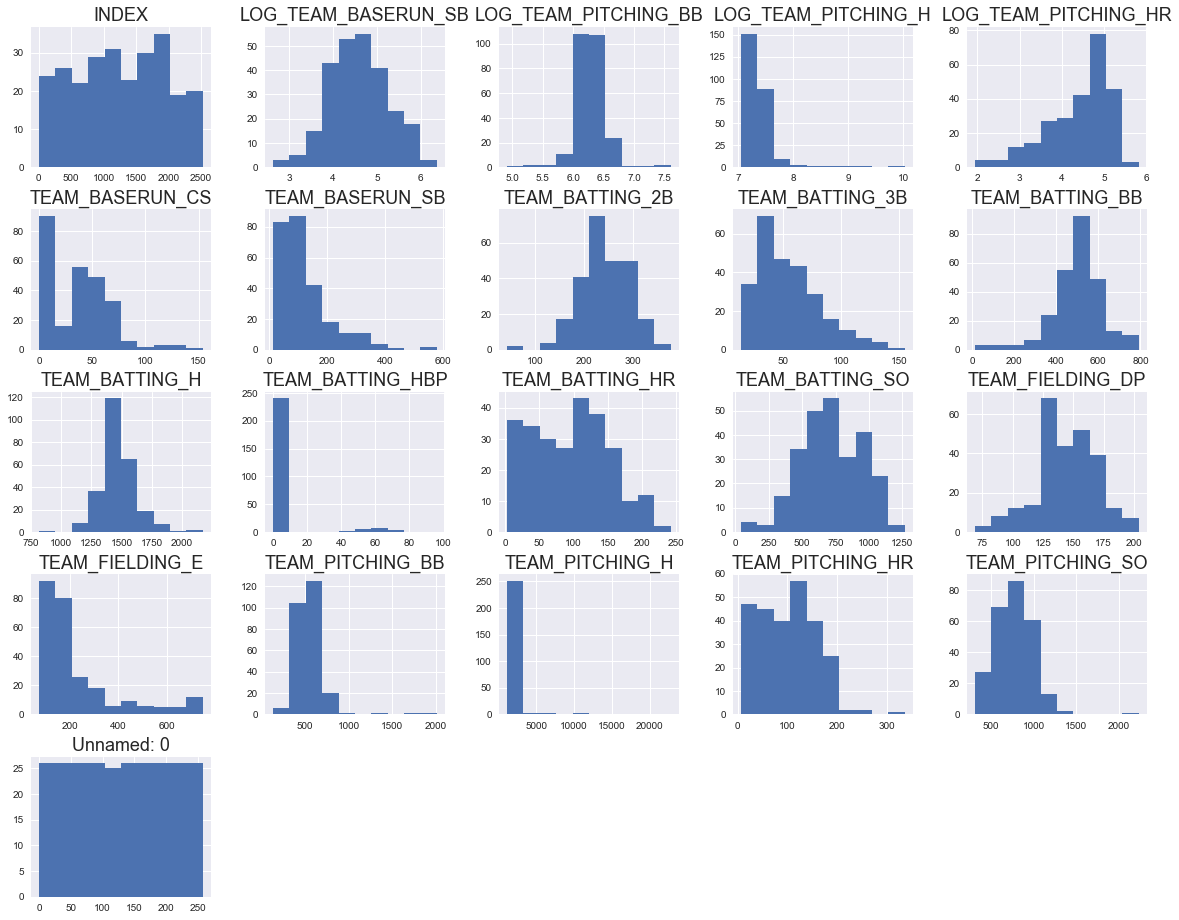

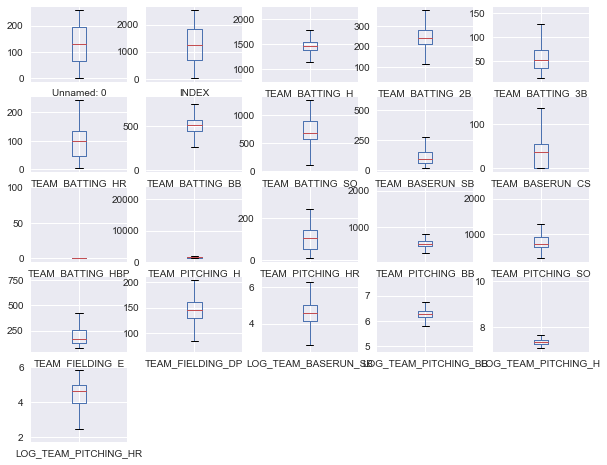

In [16]:
# Now let's take another look at the cleaned and transformed dataset
test1.hist(figsize=(20,16))
test1.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

In [52]:
# This can be used to quickly change the variables for testing plots in this cell only
#myresponsevar = 'TARGET_WINS'
#myresponsevar = 'LOG_TARGET_WINS'

# goodhitting = ['TEAM_BATTING_HR', 'TEAM_BATTING_1B', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB', 'TEAM_BATTING_HBP']
# goodother = ['TEAM_PITCHING_SO', 'TEAM_FIELDING_DP', 'TEAM_BASERUN_SB']
# badpitching = ['TEAM_PITCHING_H', 'TEAM_PITCHING_HR', 'TEAM_PITCHING_BB']
# badoffense = ['TEAM_BATTING_SO', 'TEAM_BASERUN_CS']
# baddefense = ['TEAM_FIELDING_E']

# This was used for first Kaggle submissions 1-3
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_BASERUN_CS', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB',
#               'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

# Use all vars - predictions4
# myresponsevar = 'TARGET_WINS'
# mypredvars = all

# New Test - predictions5
# myresponsevar = 'LOG_TARGET_WINS'
# mypredvars = ['TEAM_BATTING_1B', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_HR', 'TEAM_BATTING_BB', 
#               'TEAM_PITCHING_BB', 'TEAM_FIELDING_E', 'TEAM_PITCHING_H']
#preds5 tried but not used
#mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_1B', 'TEAM_BATTING_BB', 'TEAM_PITCHING_SO', 'TEAM_FIELDING_E', 'TEAM_PITCHING_H']
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB',
#               'TEAM_PITCHING_SO', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_H']

# Predictions 6
# myresponsevar = 'SQRT_TARGET_WINS'
# mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_HR', 'TEAM_BATTING_3B', 'TEAM_BATTING_SO', 'TEAM_BATTING_HBP',
#               'TEAM_BASERUN_SB', 'TEAM_PITCHING_SO', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_H', 'TEAM_FIELDING_DP', 'TEAM_FIELDING_E']

# Predictions 7
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_1B', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_HBP',
#               'TEAM_PITCHING_SO', 'TEAM_FIELDING_DP', 'TEAM_BASERUN_SB', 'TEAM_PITCHING_H', 'TEAM_PITCHING_BB']

# Predictions 8
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_1B', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB', 'TEAM_BATTING_HBP',
#               'TEAM_PITCHING_SO', 'TEAM_BASERUN_SB'] #all good items

# Predictions 9
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_BB', 'TEAM_BATTING_SO', 'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO',
#               'TEAM_FIELDING_E', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

# Predictions 10
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_1B', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB',
#               'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

# Predictions 11 / 12
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_BASERUN_CS', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB',
#               'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

# Predictions 13
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB', 'TEAM_BASERUN_SB',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB',
#               'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

# Predictions 14
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_H', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB', 'LOG_TEAM_BASERUN_SB',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_FIELDING_E', 'LOG_TEAM_PITCHING_BB',
#               'LOG_TEAM_PITCHING_H', 'LOG_TEAM_PITCHING_HR']

# Predictions 15
# myresponsevar = 'TARGET_WINS'
# mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_BB', 'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO',
#               'TEAM_FIELDING_E', 'TEAM_PITCHING_BB', 'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']


# Other comparison tests used - remove before submitting
#mypredvars = ['TEAM_BATTING_H', 'LOG_TEAM_BATTING_H', 'SQRT_TEAM_BATTING_H']
# mypredvars = ['TEAM_BATTING_H', 'TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB', 'TEAM_BASERUN_SB',
#               'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_BASERUN_CS', 'TEAM_FIELDING_E', 'TEAM_PITCHING_BB',
#               'TEAM_PITCHING_H', 'TEAM_PITCHING_HR']

#submit 2 trials
myresponsevar = 'TARGET_WINS'
mypredvars = ['TEAM_BATTING_HR', 'TEAM_BATTING_2B', 'TEAM_BATTING_3B', 'TEAM_BATTING_BB',
              'TEAM_FIELDING_DP', 'TEAM_PITCHING_SO', 'TEAM_BATTING_SO', 'TEAM_BASERUN_CS', 'TEAM_FIELDING_E', 'LOG_TEAM_PITCHING_BB',
              'LOG_TEAM_PITCHING_H', 'LOG_TEAM_PITCHING_HR']


predstr = ''
for i in mypredvars:
    predstr = predstr + ' + ' + str(i)

# Now build the string for the linear model
modelstr = myresponsevar + predstr
modelstr = modelstr.replace('+', '~', 1) #replace only the first instance
print(modelstr) # this is the string replesenting the MLR model for use below

TARGET_WINS ~ TEAM_BATTING_HR + TEAM_BATTING_2B + TEAM_BATTING_3B + TEAM_BATTING_BB + TEAM_FIELDING_DP + TEAM_PITCHING_SO + TEAM_BATTING_SO + TEAM_BASERUN_CS + TEAM_FIELDING_E + LOG_TEAM_PITCHING_BB + LOG_TEAM_PITCHING_H + LOG_TEAM_PITCHING_HR


In [ ]:
# Section 2 Results:


### >>> Section 3 - Model Building

In [34]:
# test1.hist(figsize=(20,16))
# test1.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

In [33]:
#Just in case there are some variables that are highly correlated look at some scatter plots
# # option 1
# for i in mypredvars:
#     train1.plot.scatter(y=myresponsevar, x=i, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
#                         linewidths=None, verts=None, edgecolors=None )

# option 2 - shown with regr line
# for i in mypredvars:
#     sm.graphics.plot_partregress(myresponsevar, i, [], data = train1, obs_labels = False)

In [53]:
#From sample code
#Take a look at a possible model
print(modelstr + str('\n'))

#previous tests
#regres1 = smf.ols('LOG_TARGET_WINS ~ TEAM_BATTING_H', data = train1)
#regres1 = smf.ols('TARGET_WINS ~ TEAM_BATTING_H + TEAM_BATTING_BB', data = train1)
#regres1 = smf.ols('TARGET_WINS ~ TEAM_BATTING_2B + TEAM_BATTING_3B + TEAM_BATTING_HR + TEAM_BATTING_BB + TEAM_BASERUN_SB', data = train1)
#regres1 = smf.ols('LOG_TARGET_WINS ~ TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_BASERUN_SB + TEAM_FIELDING_DP', data = train1)
#regres1 = smf.ols('TARGET_WINS ~ TEAM_BATTING_HR + TEAM_BATTING_HBP + TEAM_BATTING_BB + TEAM_BASERUN_SB', data = train1)

'''
Function: fit model
Takes a model string & dataframe, runs the linear model calc and returns the fit result
'''
def fit_model(fullmodelstr, dataset):
    return smf.ols(fullmodelstr, data = dataset).fit()

#     regres1 = smf.ols(...
#     fit1 = regres1.fit() 
#     return fit1


TARGET_WINS ~ TEAM_BATTING_HR + TEAM_BATTING_2B + TEAM_BATTING_3B + TEAM_BATTING_BB + TEAM_FIELDING_DP + TEAM_PITCHING_SO + TEAM_BATTING_SO + TEAM_BASERUN_CS + TEAM_FIELDING_E + LOG_TEAM_PITCHING_BB + LOG_TEAM_PITCHING_H + LOG_TEAM_PITCHING_HR



In [54]:

# Run the model
result1 = fit_model(modelstr, train1)
#print(dir(result1)) #use this if you want to see teh available attributes
print (result1.summary())
print (result1.conf_int())
#dir(result1) lists other print options

# # Now run pred model on the test1 set
# predictions = result1.predict(test1)
# print(predictions)

                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     56.94
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          2.40e-120
Time:                        15:43:34   Log-Likelihood:                -9186.7
No. Observations:                2275   AIC:                         1.840e+04
Df Residuals:                    2262   BIC:                         1.847e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               65.7209 

In [55]:
'''
This code is for performing a step-wise forward selection on the defined model. 
Input: modelstr
Output: string with best AIC/BIC scores
Descr: Uses the sample code for smf.ols fit to fit the model and obtain the summary
'''

def stepwise_fwd_selection(fullmodelstr, dataset):
    #first sep string into components and save the response
    respons = fullmodelstr[:fullmodelstr.find(' ~')]
    allpredictors = fullmodelstr[fullmodelstr.find(' ~')+3:]
    print(allpredictors)
    
    #ok, now split preds based on number of '+' char found in allpredictors string + 1
    num_of_preds = 0
    if(fullmodelstr.count('+') < 1):
        num_of_preds = 1
    else:
        num_of_preds = fullmodelstr.count('+') + 1
    
    #separate out preditors from the string
    preds = []
    tmpstr = allpredictors
    for i in list(range(num_of_preds)):
        #print('tmpstr is: ' + str(tmpstr))
        if(tmpstr.count('+') < 1):
            preds.append(tmpstr)
        else:
            preds.append(tmpstr[:tmpstr.find(' +')])
        tmpstr = tmpstr[tmpstr.find(' +')+3:]
    
    #ok, now we need to run the linear model for each iteration starting with the first and sequentially adding all predictors
    # fit the partial model for each step starting
    adjR2 = []
    aic = []
    bic = []
    
    steppreds = ''
    for i in preds:
        stepmodelstr = str(respons) + ' ~ ' + steppreds + str(i)
        stepresult = fit_model(stepmodelstr, train1)
        steppreds = steppreds + str(i) + ' + '
        adjR2.append(stepresult.rsquared_adj)
        aic.append(stepresult.aic)
        bic.append(stepresult.bic)
        #print (stepresult.summary())
        #print('+++++++++++++++++++++++++++++++++++++++++\n\n')
    
    print(adjR2)
#     print('AIC values: ' + str(aic))
#     print('BIC values: ' + str(bic))
#     return respons, preds
    return np.argmax(adjR2), np.argmin(aic), np.argmin(bic)

# Next try it out
output1, output2, output3 = stepwise_fwd_selection(modelstr, None)
print(output1)
print(output2)
print(output3)




TEAM_BATTING_HR + TEAM_BATTING_2B + TEAM_BATTING_3B + TEAM_BATTING_BB + TEAM_FIELDING_DP + TEAM_PITCHING_SO + TEAM_BATTING_SO + TEAM_BASERUN_CS + TEAM_FIELDING_E + LOG_TEAM_PITCHING_BB + LOG_TEAM_PITCHING_H + LOG_TEAM_PITCHING_HR
[0.022626330782965054, 0.0820139521697234, 0.15017217966990348, 0.174143726940155, 0.1957303173617687, 0.20731936097751102, 0.20717386050460318, 0.20688571801327804, 0.21261405176216486, 0.2166807424867654, 0.22741230496242015, 0.22791186096443516]
11
11
10


The sections that follow are a way to perform R-like model output graphs in Python that mimic the lm plot functionality

A huge shout-out to @emredjan for the original blog post about R-to-Python functionality translation [here](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)

In [56]:
# fitted values (need a constant term for intercept)
model_fitted_y = result1.fittedvalues

# model residuals
model_residuals = result1.resid

# normalized residuals
model_norm_residuals = result1.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = result1.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = result1.get_influence().cooks_distance[0]

In [ ]:
# Print each plot output


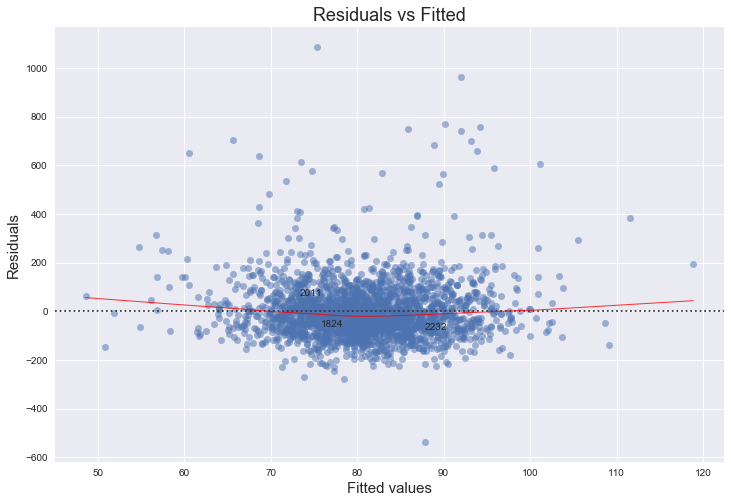

In [57]:
#1 Residual Plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'TEAM_BATTING_H', data = train1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

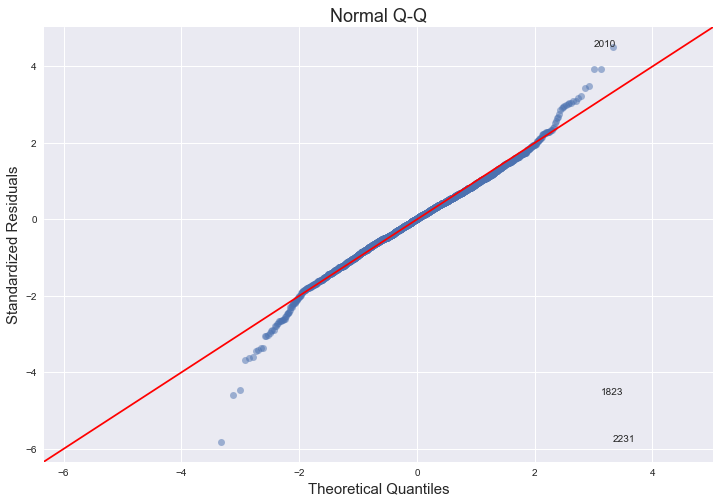

In [58]:
#2 Q-Q Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

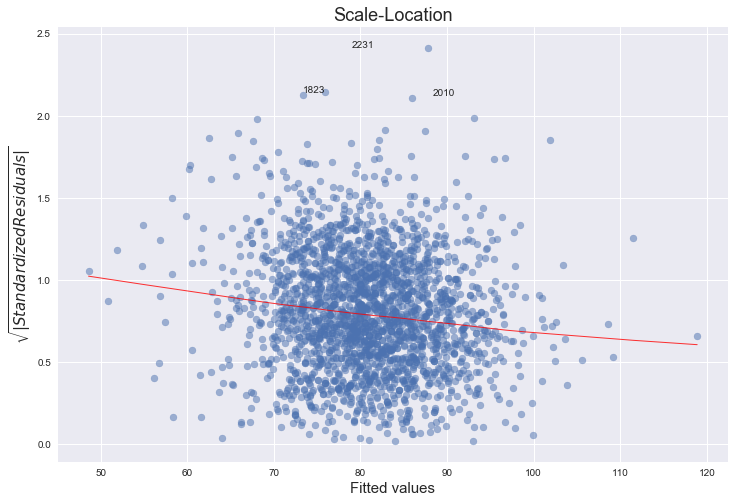

In [59]:
#3 Scale-Location Plot

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

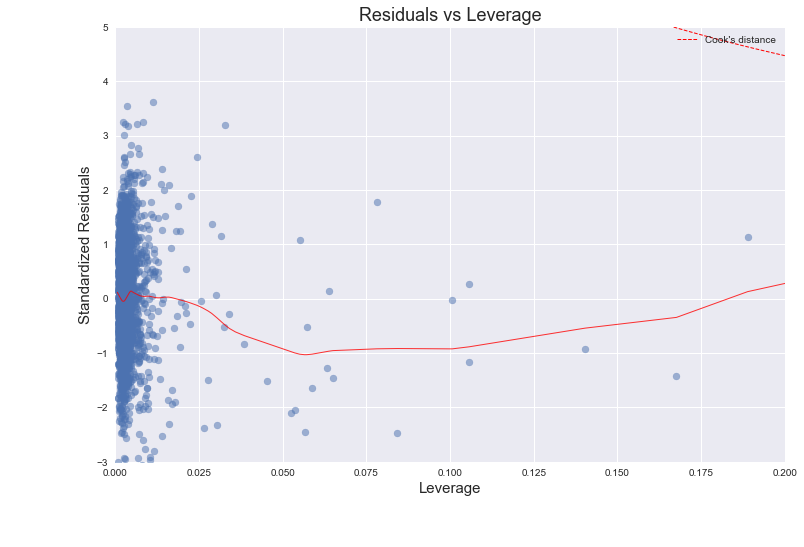

In [26]:
#4 Leverage Plot
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(result1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

### >>> Section 4 - Select Model

In [27]:
print(modelstr)

#Take a look at the final model
regres_final = smf.ols(modelstr , data = train1)  
result_final = regres_final.fit()  
print (result_final.summary())
print (result_final.conf_int())
#dir(result) lists other print options

final_predictions = result_final.predict(test1)
print(final_predictions)

TARGET_WINS ~ TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_FIELDING_DP + TEAM_PITCHING_SO + TEAM_BATTING_SO + TEAM_FIELDING_E + TEAM_PITCHING_BB + TEAM_PITCHING_H + TEAM_PITCHING_HR
                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     96.17
Date:                Sun, 15 Jul 2018   Prob (F-statistic):          3.16e-152
Time:                        21:15:10   Log-Likelihood:                -9118.8
No. Observations:                2275   AIC:                         1.826e+04
Df Residuals:                    2265   BIC:                         1.831e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    st

### >>> Section 5 - Deployed Model

In [28]:
# TODO: Write out model equation in explicit form
# Note: Just disply it here no code to run - copy to report.
modelstr

'TARGET_WINS ~ TEAM_BATTING_H + TEAM_BATTING_BB + TEAM_FIELDING_DP + TEAM_PITCHING_SO + TEAM_BATTING_SO + TEAM_FIELDING_E + TEAM_PITCHING_BB + TEAM_PITCHING_H + TEAM_PITCHING_HR'

### >>> Section 6 - Scored Data File

In [29]:
# From provided sample code

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
d = {'P_TARGET_WINS': round(final_predictions, 1)}
#df1 = testdf[['INDEX']]
df1 = pd.to_numeric(testdf['INDEX'], downcast = 'integer').to_frame()

df2 = pd.DataFrame(data = d)
output_file = pd.concat([df1,df2], axis = 1, join_axes = [df1.index])

#Submit your file as csv using the following code to save on your computer
#output_file.to_csv('output/predictions.csv', index = False)
#output_file.to_csv('output/andrew_knight_predictions1.csv') # This file was my first submission to Kaggle on 20180710-0858 - failed
#output_file.to_csv('output/andrew_knight_predictions2.csv', index = False) # Second attempt on 20180710-0928 still has formatting issues - failed
#output_file.to_csv('output/andrew_knight_predictions3.csv', index = False) # Third attempt on 20180710 - THIS WORKED FINALLY!

#new test
#output_file.to_csv('output/andrew_knight_predictions4.csv', index = False) # First attempt on 20180711-2155
#output_file.to_csv('output/andrew_knight_predictions5.csv', index = False) # Using LOG_TARGET_WINS on 20180711-2315
#output_file.to_csv('output/andrew_knight_predictions6.csv', index = False) # Using SQRT_TARGET_WINS on 20180711-2332
#output_file.to_csv('output/andrew_knight_predictions7.csv', index = False) # Preds7 subm on 20180712-0048
#output_file.to_csv('output/andrew_knight_predictions8.csv', index = False) # Preds8 subm on 20180712-0053
#output_file.to_csv('output/andrew_knight_predictions9.csv', index = False) # Preds9 subm on 20180712-0152 and -2256
#output_file.to_csv('output/andrew_knight_predictions10.csv', index = False) # Pred10 subm on 20180712-2301
#output_file.to_csv('output/andrew_knight_predictions11.csv', index = False) # Pred11 subm on 20180712-2311
#output_file.to_csv('output/andrew_knight_predictions12.csv', index = False) # Pred12 subm on 20180712-2318
#output_file.to_csv('output/andrew_knight_predictions13.csv', index = False) # Pred13 subm on 20180712-2326
#output_file.to_csv('output/andrew_knight_predictions14.csv', index = False) # Pred14
output_file.to_csv('output/andrew_knight_predictions15.csv', index = False) # Pred15



In [30]:
# sanity check section

### Submit to Kaggle
Use the following to submit

`kaggle competitions submit -c moneyball-411-summer-2018 -f submission.csv -m "Message" `


### Useful References

[Baseball stats](https://www.baseball-reference.com/)

[sklearn linear models](http://scikit-learn.org/stable/modules/linear_model.html)

[stats models package fitting models info](https://www.statsmodels.org/stable/example_formulas.html#ols-regression-using-formulas)
